In [ ]:
!pip install spotipy

     |████████████████████████████████| 138 kB 7.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from scipy.spatial.distance import cdist
from skimage import io
from collections import defaultdict

In [ ]:
tracks = pd.read_csv('drive/MyDrive/_MusicRecommendation/tracks.csv')
print(tracks.head())

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
tracks.release_date

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
586667    2020-09-26
586668    2020-10-21
586669    2020-09-02
586670    2021-03-05
586671    2015-07-01
Name: release_date, Length: 586672, dtype: object

In [ ]:
tracks.release_date = tracks.release_date.map(lambda date: date.split("-")[0]).astype("int")

In [ ]:
tracks.rename(columns={'release_date': 'release_year'}, inplace=True)

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_year      586672 non-null  int64  
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
tracks = tracks.drop(['artists', 'id_artists'], axis=1)
tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'release_year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [ ]:
features = tracks.columns.drop(['id', 'name', 'release_year', 'duration_ms', 'time_signature', 'key', 'mode', 'popularity', 'explicit']).to_list()
print(features)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


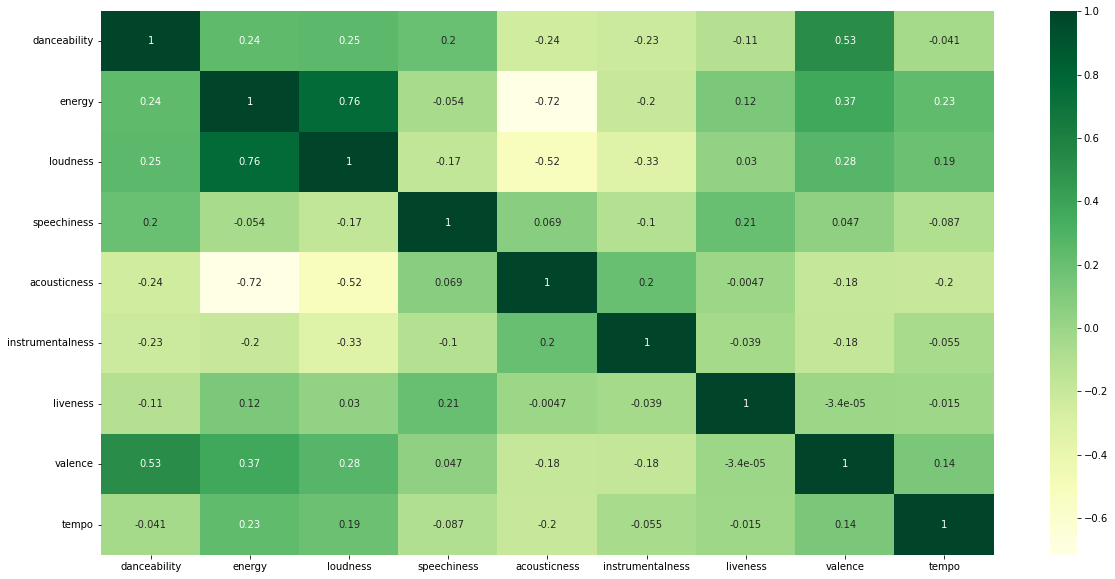

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
correlation = tracks[features].corr()
sns.heatmap(correlation, annot=True, cmap='YlGn')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
music_cluster =  Pipeline([('scaler',StandardScaler()),
                           ('kmeans',KMeans(n_clusters=20,
                           verbose=2,n_init=4))],verbose=True)

In [ ]:
trainX = tracks[features]
music_cluster.fit(trainX)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete
Iteration 0, inertia 2289405.9195089927
Iteration 1, inertia 1829888.949925591
Iteration 2, inertia 1772208.7358629974
Iteration 3, inertia 1744744.0245673438
Iteration 4, inertia 1726397.3056516186
Iteration 5, inertia 1713224.101225975
Iteration 6, inertia 1703854.9723553834
Iteration 7, inertia 1696986.6536665775
Iteration 8, inertia 1691917.914322577
Iteration 9, inertia 1688213.7098268839
Iteration 10, inertia 1685426.996407281
Iteration 11, inertia 1683401.6941541247
Iteration 12, inertia 1681855.574354978
Iteration 13, inertia 1680653.489898271
Iteration 14, inertia 1679668.478663613
Iteration 15, inertia 1678799.8790519151
Iteration 16, inertia 1677980.4175368315
Iteration 17, inertia 1677201.646505978
Iteration 18, inertia 1676446.8824597364
Iteration 19, inertia 1675685.3364478094
Iteration 20, inertia 1674921.772783388
Iteration 21, inertia 1674135.53915577
Iteration 22, inertia 16

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=20, n_init=4, verbose=2))],
         verbose=True)

In [ ]:
tracks['cluster'] = music_cluster.predict(trainX)

In [ ]:
tracks.cluster

0         15
1          3
2         13
3          1
4         13
          ..
586667     8
586668     7
586669    16
586670    10
586671     7
Name: cluster, Length: 586672, dtype: int32

In [ ]:
pca = Pipeline([('scaler',StandardScaler()),
                ('PCA',PCA(n_components=2))])

In [ ]:
music_dim_red = pca.fit_transform(trainX)

In [ ]:
projection = pd.DataFrame(columns=['A', 'B'], data=music_dim_red)
projection

,A,B
0,1.929926,0.686922
1,1.894876,4.389878
2,2.673761,0.198141
3,4.403877,-1.143507
4,2.950273,-0.197841
...,...,...
586667,0.485013,-0.772569
586668,-1.943309,-0.066776
586669,1.701880,-0.732882
586670,-0.889747,0.133865


In [ ]:
projection['name'] = tracks.name
projection['cluster'] = tracks.cluster
projection

,A,B,name,cluster
0,1.929926,0.686922,Carve,15
1,1.894876,4.389878,Capítulo 2.16 - Banquero Anarquista,3
2,2.673761,0.198141,Vivo para Quererte - Remasterizado,13
3,4.403877,-1.143507,El Prisionero - Remasterizado,1
4,2.950273,-0.197841,Lady of the Evening,13
...,...,...,...,...
586667,0.485013,-0.772569,云与海,8
586668,-1.943309,-0.066776,blind,7
586669,1.701880,-0.732882,What They'll Say About Us,16
586670,-0.889747,0.133865,A Day At A Time,10


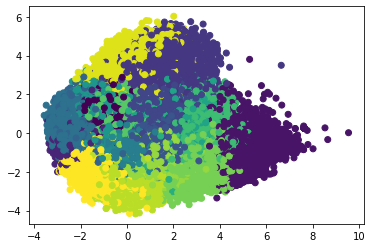

In [ ]:
plt.scatter(x=projection.A, y=projection.B, c=projection.cluster)

In [ ]:
import os
os.environ['SPOTIPY_CLIENT_ID'] = '2ce27fd165634a7a9cff07b9e7355355'
os.environ['SPOTIPY_CLIENT_SECRET'] = '82b208ef35f148358bab8efa5e5f4a13'

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
                                                                os.environ['SPOTIPY_CLIENT_ID'],
                                                                os.environ['SPOTIPY_CLIENT_SECRET']))

In [ ]:
def get_song_links_images(rec_songs):
    results = []
    media = []
    names = []
    links = []
    fig=plt.figure(figsize=(25,25))
    col=3
    row=4
    for song in rec_songs:
        names.append(song['name'])
        links.append('https://open.spotify.com/track/'+song['id'])
        result = spotify.search(q=song['name'],type = 'track',limit = 1)
        print(result)
        results.append(result['tracks']['items'][0]['album']['images'][0])
    for i,img in enumerate(results):
        img.update()
        fig.add_subplot(row,col,i+1)
        plot = io.imread(img['url'])
        plt.axis('off')
        plt.imshow(plot)
        plt.title(names[i])
        plt.xlabel(links[i])        
    fig.tight_layout(pad=10.0)
    plt.show()

In [ ]:

def recommend_song(user_list,n_songs = 10):
    global features
    results = []
    feature_dict = defaultdict()
    attribute = {}
    columns = ['id','name']
    for song in user_list:
        result = spotify.search(q=song,type='track',limit=1)
        result_id = result['tracks']['items'][0]['id']
        results.append(result_id)
    if results != []:
        songs = spotify.audio_features(results)
        for song in songs:
            for key in features:
                if key not in attribute.keys():
                    attribute[key] = [song[key]]
                else:
                    attribute[key].append(song[key])
        attribute = pd.DataFrame(attribute)
        print(attribute)
        for feature in attribute.columns:
            attribute[feature] = attribute[feature].mean()
        scaler = music_cluster.steps[0][1]
        scaled_data = scaler.transform(trainX)
        scaled_mean_vector = scaler.transform(attribute)
        distances = cdist(scaled_mean_vector, scaled_data,'cosine')
        index = list(np.argsort(distances)[:,:n_songs][0])
        rec_songs = tracks.iloc[index]
        rec_songs = rec_songs[columns].to_dict(orient='records')
        get_song_links_images(rec_songs)

Recommendations for:

Song: Heat Waves
   danceability  energy  loudness  speechiness  acousticness  \
0         0.761   0.525      -6.9       0.0944          0.44   

   instrumentalness  liveness  valence  tempo  
0          0.000007    0.0921    0.531  80.87  
{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Heat+Waves&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4yvcSjfu4PC0CYQyLy4wSq'}, 'href': 'https://api.spotify.com/v1/artists/4yvcSjfu4PC0CYQyLy4wSq', 'id': '4yvcSjfu4PC0CYQyLy4wSq', 'name': 'Glass Animals', 'type': 'artist', 'uri': 'spotify:artist:4yvcSjfu4PC0CYQyLy4wSq'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s

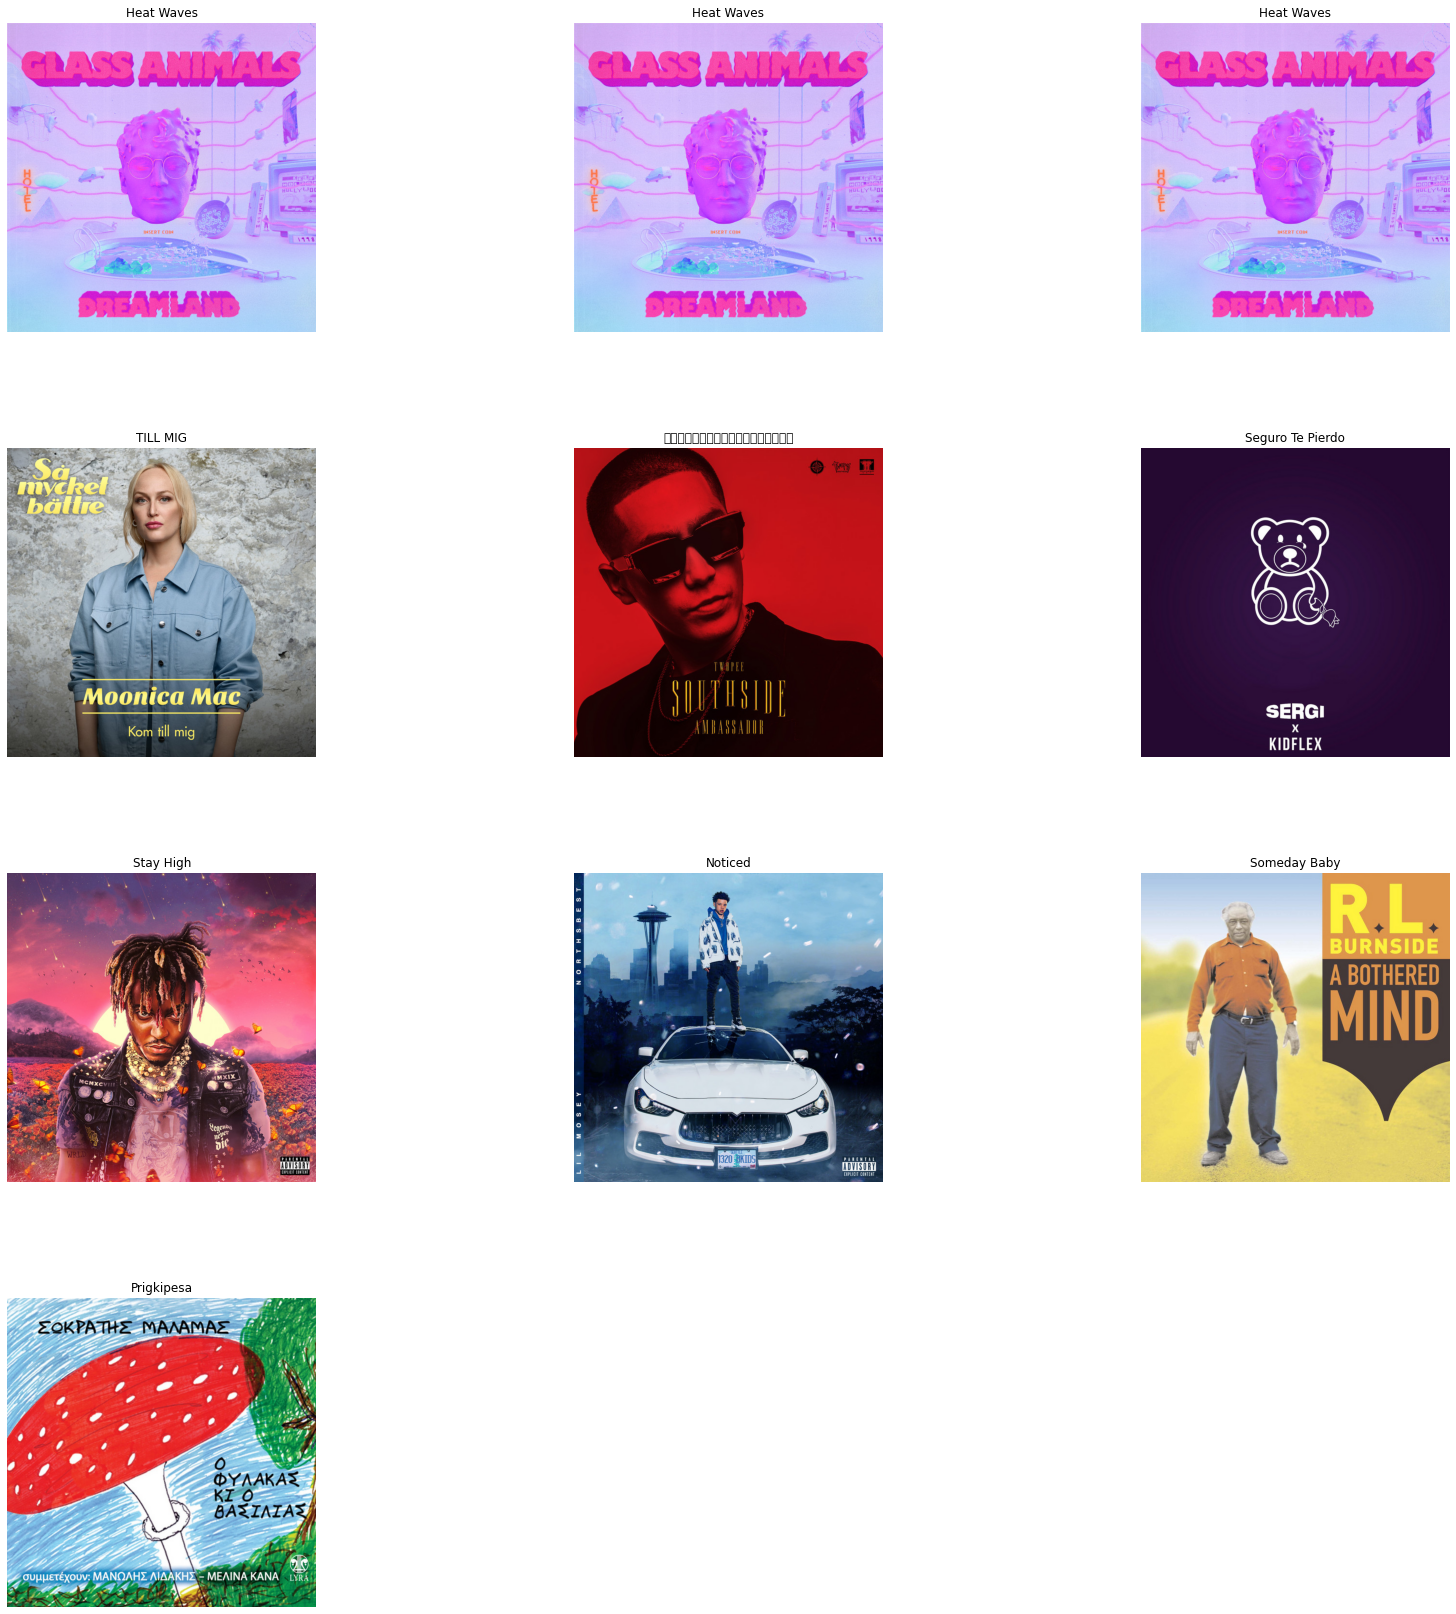

In [ ]:
print("Recommendations for:\n")
song = input("Song: ").replace(' ','%')

recommend_song([song])